In [1]:
# Step 1: Download COCO 2017 train images
!wget http://images.cocodataset.org/zips/train2017.zip -O train2017.zip

# Step 2: Unzip the dataset
!unzip -q train2017.zip -d ./coco_dataset/


--2025-06-20 07:25:59--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.227.105, 52.216.32.121, 3.5.28.230, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.227.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  47.1MB/s    in 6m 50s  

2025-06-20 07:32:49 (45.0 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [2]:
import os
from PIL import Image

# Path to COCO images
coco_path = './coco_dataset/train2017'
image_files = [f for f in os.listdir(coco_path) if f.endswith('.jpg')]

# Display number of images and one sample
print(f"Total images found: {len(image_files)}")
Image.open(os.path.join(coco_path, image_files[0])).show()


Total images found: 118287


# Applying watermark

In [3]:
!wget https://www.dropbox.com/scl/fi/uc28b6btxpdqjrgt32jay/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m&st=ddrylotw&dl=0
!mv /content/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m arial.ttf

--2025-06-20 08:07:57--  https://www.dropbox.com/scl/fi/uc28b6btxpdqjrgt32jay/arial.ttf?rlkey=8trb3rko5jf83m0exkx7ogk4m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd8a925f59a28ce25f4b2f68f0f.dl.dropboxusercontent.com/cd/0/inline/Cr9Kpac46x588WwCls5BSPxQkechjftZ97qXHSzvbjXkFl6S0yNXj8_-WgmzSfspIPgoOsSyOeq9OOGgxacfkTUa-JDpwdQy1GMpI5ZBmY1Xs1X31HtYxHahsxmobAEfMQ4YqsOrvFNS2WaTU_gv8C47/file# [following]
--2025-06-20 08:07:57--  https://ucd8a925f59a28ce25f4b2f68f0f.dl.dropboxusercontent.com/cd/0/inline/Cr9Kpac46x588WwCls5BSPxQkechjftZ97qXHSzvbjXkFl6S0yNXj8_-WgmzSfspIPgoOsSyOeq9OOGgxacfkTUa-JDpwdQy1GMpI5ZBmY1Xs1X31HtYxHahsxmobAEfMQ4YqsOrvFNS2WaTU_gv8C47/file
Resolving ucd8a925f59a28ce25f4b2f68f0f.dl.dropboxusercontent.com (ucd8a925f59a28ce25f4b2f68f0f.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:

In [6]:
import os
import shutil

# Source folder of COCO images
source_folder = '/content/coco_dataset/train2017'

# Output folders
watermark_folder = '/content/coco_dataset/watermark/'
no_watermark_folder = '/content/coco_dataset/no_watermark/'

os.makedirs(watermark_folder, exist_ok=True)
os.makedirs(no_watermark_folder, exist_ok=True)

# Select only first 1000 images (you can change this number)
files = [f for f in os.listdir(source_folder) if f.endswith('.jpg')][:10000]
half_point = len(files) // 2

# Move half to watermark, half to no_watermark
for file in files[:half_point]:
    shutil.copy(os.path.join(source_folder, file), os.path.join(watermark_folder, file))

for file in files[half_point:]:
    shutil.copy(os.path.join(source_folder, file), os.path.join(no_watermark_folder, file))


In [7]:
from PIL import Image, ImageDraw, ImageFont
import random
from tqdm import tqdm

def apply_random_watermarks(image_path, watermark_text, output_path, spots):
    with Image.open(image_path) as img:
        img = img.convert('RGBA')
        watermark_img = Image.new('RGBA', img.size, (0, 0, 0, 0))
        draw = ImageDraw.Draw(watermark_img)
        width, height = img.size

        for _ in range(spots):
            font_size = random.randint(width // 30, width // 12)
            font = ImageFont.truetype("arial.ttf", font_size)
            text_bbox = draw.textbbox((0, 0), watermark_text, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]
            x = random.randint(0, width - text_width - 1)
            y = random.randint(0, height - text_height - 1)
            draw.text((x, y), watermark_text, font=font, fill=(255, 255, 255, 170))

        watermarked_img = Image.alpha_composite(img, watermark_img)
        watermarked_img.convert('RGB').save(output_path, "JPEG")

# Output folder for watermarked images
output_folder = '/content/coco_dataset/with_watermark'
os.makedirs(output_folder, exist_ok=True)

# Arabic watermark text options
watermarks = ["إبداع", "أمل", "نور", "فكرة", "حلم", "نجاح", "شغف", "مستقبل", "أفق", "تطور"]

# Apply watermarks
for file in tqdm(os.listdir(watermark_folder)):
    input_path = os.path.join(watermark_folder, file)
    output_path = os.path.join(output_folder, file)
    if os.path.isfile(input_path):
        text = random.choice(watermarks)
        spots = random.randint(1, 3)
        apply_random_watermarks(input_path, text, output_path, spots)


100%|██████████| 5000/5000 [00:45<00:00, 110.02it/s]


# Preprocessing

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load images in RGB (default) and resize
def load_images(directory, size=(256, 256)):
    images = []
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        image = load_img(path, target_size=size)  # Default is RGB
        image = img_to_array(image)
        image /= 255.0  # Normalize to [0,1]
        images.append(image)
    return np.array(images)

# Dataset paths
watermark_path = '/content/coco_dataset/watermark/'
no_watermark_path = '/content/coco_dataset/no_watermark/'

# Load datasets
watermarked_images = load_images(watermark_path)
clean_images = load_images(no_watermark_path)


In [9]:
watermarked_images.shape

(5000, 256, 256, 3)

In [10]:
clean_images.shape

(5500, 256, 256, 3)

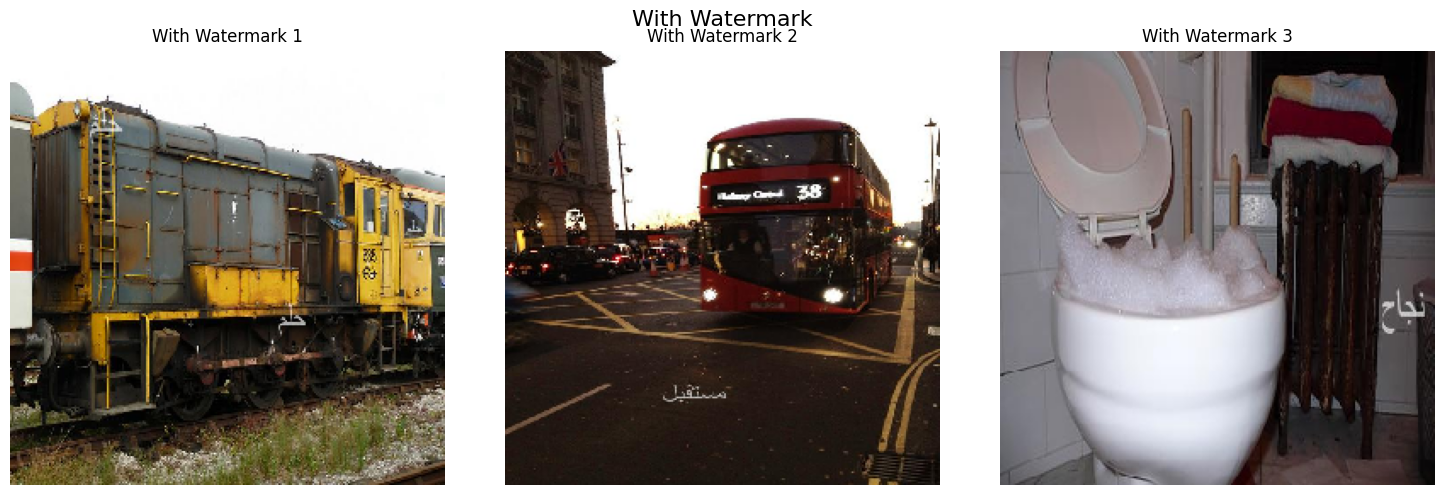

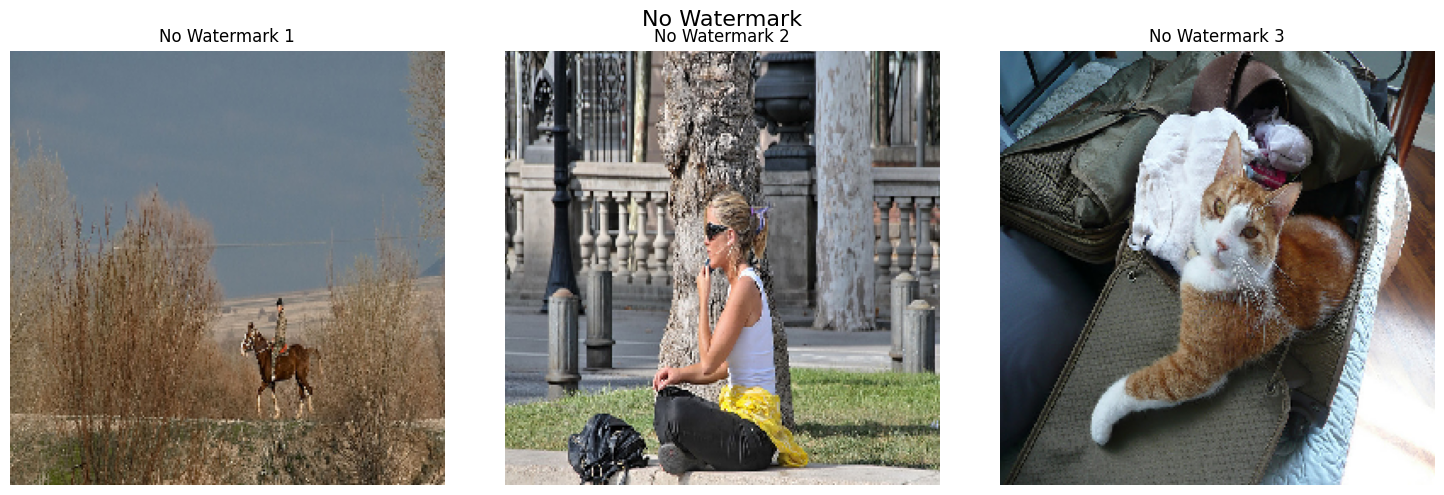

In [11]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def show_sample_images(folder_path, title="", num_images=3):
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    selected_files = random.sample(files, min(num_images, len(files)))

    plt.figure(figsize=(15, 5))
    for i, file in enumerate(selected_files):
        img_path = os.path.join(folder_path, file)
        img = load_img(img_path, target_size=(256, 256))  # Resize if needed
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{title} {i+1}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Display images
show_sample_images('/content/coco_dataset/with_watermark', title='With Watermark')
show_sample_images('/content/coco_dataset/no_watermark', title='No Watermark')


# GAN

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Flatten, Dense, Conv2DTranspose, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Generator for RGB images (input and output: 256x256x3)
def build_generator():
    input_img = Input(shape=(256, 256, 3))
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_img)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(3, (3, 3), padding='same')(x)
    x = Activation('tanh')(x)
    return Model(inputs=input_img, outputs=x)

# Discriminator for RGB images
def build_discriminator():
    input_img = Input(shape=(256, 256, 3))
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(input_img)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    return Model(inputs=input_img, outputs=x)

# Build models
generator = build_generator()
discriminator = build_discriminator()


In [ ]:
# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Freeze the discriminator during generator training
discriminator.trainable = False

# Generator input: RGB watermarked image
z = Input(shape=(256, 256, 3))  # Updated from (256, 256, 1) to (256, 256, 3)

# Generator output: predicted clean image
img = generator(z)

# Discriminator output: real/fake classification
valid = discriminator(img)

# Combined model (used to train the generator)
combined = Model(inputs=z, outputs=[valid, img])
combined.compile(loss=['binary_crossentropy', 'mse'], optimizer=Adam(0.0002, 0.5))


In [ ]:
def train(epochs, batch_size=32, save_interval=1000):
    for epoch in range(epochs):
        # Sample a batch of paired watermarked and clean images
        idx = np.random.randint(0, watermarked_images.shape[0], batch_size)
        real_imgs = clean_images[idx]              # Ground truth clean RGB images
        watermarked_imgs = watermarked_images[idx] # Input watermarked RGB images

        # Generate predicted clean images from watermarked ones
        gen_imgs = generator.predict(watermarked_imgs)

        # Labels for real and fake images
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        # Train discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator (try to fool discriminator + minimize reconstruction loss)
        g_loss = combined.train_on_batch(watermarked_imgs, [valid, real_imgs])

        # Log progress
        if epoch % save_interval == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss}]")


train(epochs=200000, batch_size=32, save_interval=1000)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

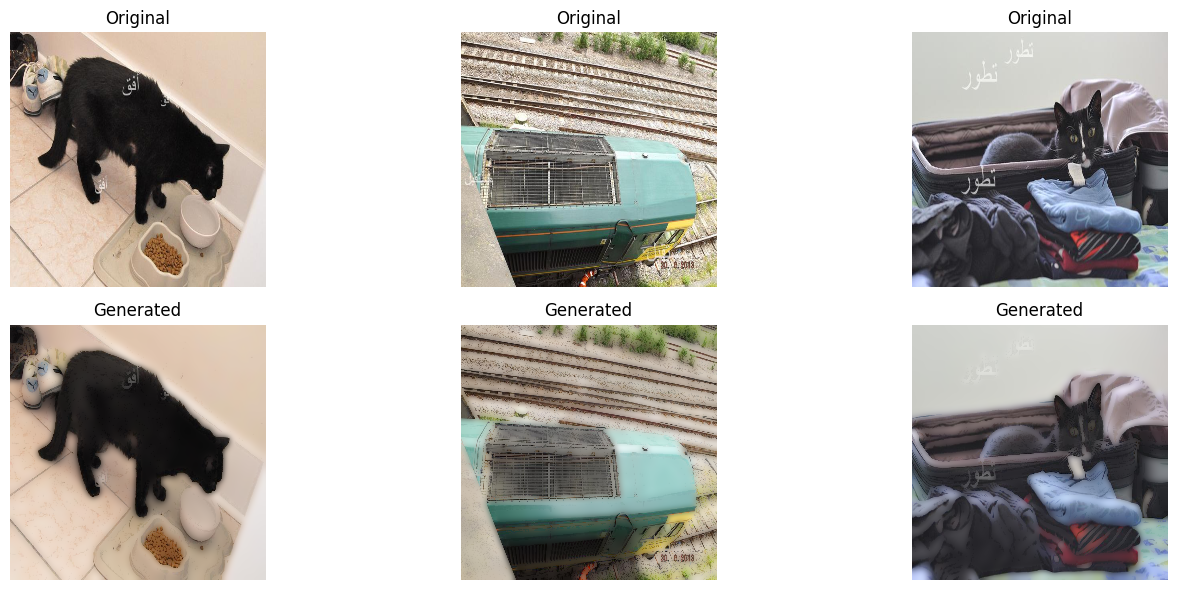

In [18]:
import matplotlib.pyplot as plt

def plot_comparison(watermarked, clean, generated, n=3):
    plt.figure(figsize=(15, 10))  # increase the figure size
    for i in range(n):
        # Display watermarked image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(watermarked[i].reshape(256, 256), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display clean image
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(clean[i].reshape(256, 256), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display generated image
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(generated[i].reshape(256, 256), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Select a sample of images to display
idx = np.random.randint(0, watermarked_images.shape[0], 3)  # select only 3 samples
sample_watermarked = watermarked_images[idx]
sample_clean = clean_images[idx]
sample_generated = generator.predict(sample_watermarked)

plot_comparison(sample_watermarked, sample_clean, sample_generated)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256)

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction)))
        psnr_values.append(psnr(original, prediction, data_range=1.0))
        ssim_values.append(ssim(original, prediction, data_range=1.0))

    average_rmse = np.mean(rmse_values)
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

    return average_rmse, average_psnr, average_ssim


# Generate predictions for the entire test set
test_watermarked = watermarked_images  # Assuming 'watermarked_images' contains all test images
test_clean = clean_images  # Assuming 'clean_images' contains all original images
test_generated = generator.predict(test_watermarked)

# Calculate metrics for the entire test set
average_rmse, average_psnr, average_ssim = calculate_metrics(test_clean, test_generated)
print("Average RMSE:", average_rmse)
print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)





157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step
Average RMSE: 0.28854931479122936
Average PSNR: 10.941745571629848
Average SSIM: 0.11670505682147861


157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


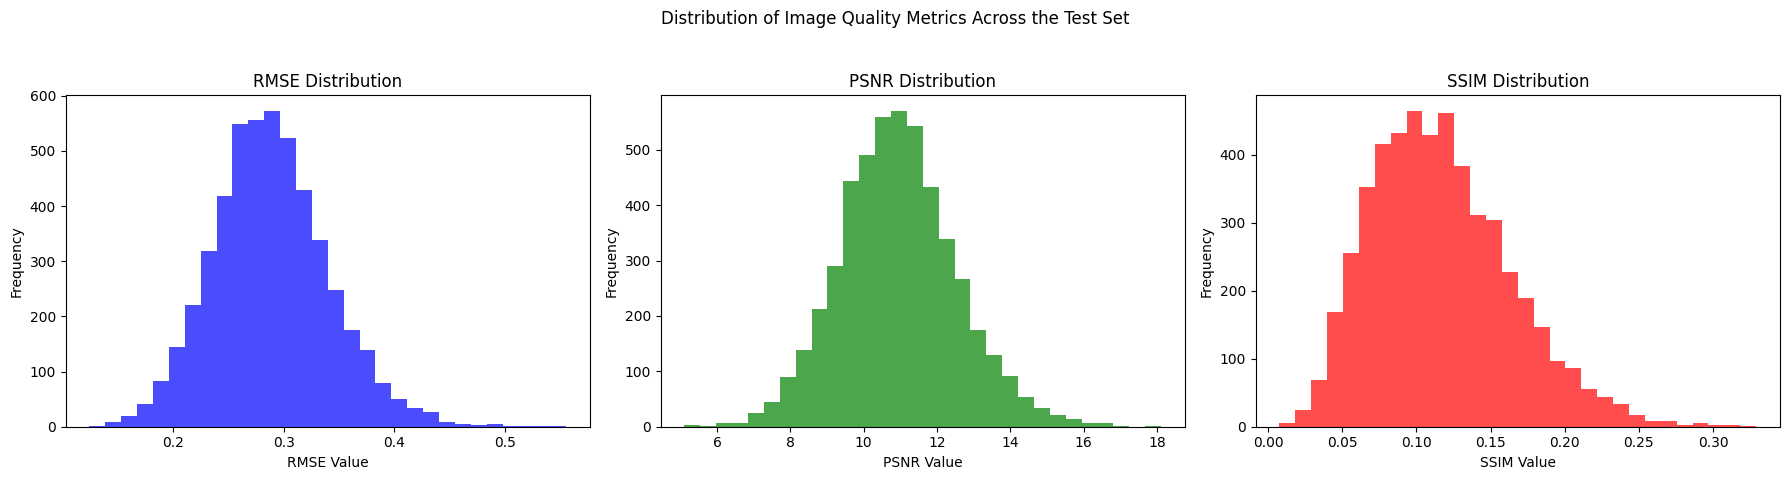

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256)

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction)))
        psnr_values.append(psnr(original, prediction, data_range=1.0))  # <-- Fix here
        ssim_values.append(ssim(original, prediction, data_range=1.0))  # <-- And here

    return rmse_values, psnr_values, ssim_values


# Generate predictions for the entire test set
test_watermarked = watermarked_images  # Assuming 'watermarked_images' contains all test images
test_clean = clean_images  # Assuming 'clean_images' contains all original images
test_generated = generator.predict(test_watermarked)

# Calculate metrics for the entire test set
rmse_values, psnr_values, ssim_values = calculate_metrics(test_clean, test_generated)

# Plotting histograms for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Image Quality Metrics Across the Test Set')

# RMSE Histogram
axes[0].hist(rmse_values, bins=30, color='blue', alpha=0.7)
axes[0].set_title('RMSE Distribution')
axes[0].set_xlabel('RMSE Value')
axes[0].set_ylabel('Frequency')

# PSNR Histogram
axes[1].hist(psnr_values, bins=30, color='green', alpha=0.7)
axes[1].set_title('PSNR Distribution')
axes[1].set_xlabel('PSNR Value')
axes[1].set_ylabel('Frequency')

# SSIM Histogram
axes[2].hist(ssim_values, bins=30, color='red', alpha=0.7)
axes[2].set_title('SSIM Distribution')
axes[2].set_xlabel('SSIM Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




# Attention mechanism

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Flatten, Dense, Reshape, Conv2DTranspose, Activation, Dropout, Layer, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Define the custom SelfAttention layer
class SelfAttention(Layer):
    def __init__(self, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.query = Dense(input_shape[-1])
        self.key = Dense(input_shape[-1])
        self.value = Dense(input_shape[-1])
        super(SelfAttention, self).build(input_shape)

    def call(self, inputs):
        q = self.query(inputs)
        k = self.key(inputs)
        v = self.value(inputs)

        attention = tf.matmul(q, k, transpose_b=True)
        attention = tf.nn.softmax(attention, axis=-1)
        attended = tf.matmul(attention, v)

        return attended + inputs  # Skip connection

    def compute_output_shape(self, input_shape):
        return input_shape

In [ ]:
def build_generator():
    noise = Input(shape=(256, 256, 3))
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(noise)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = SelfAttention()(x)  # Add attention

    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization(momentum=0.8)(x)

    x = Conv2D(3, (3, 3), padding='same')(x)  # Output layer adjusted to output RGB images
    x = Activation('tanh')(x)
    model = Model(inputs=noise, outputs=x)
    return model

In [ ]:
def build_discriminator():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    image_input = Input(shape=(256, 256, 3))
    x = base_model(image_input)
    x = SelfAttention()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=image_input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Create the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

# Generator takes noise as input and generates imgs
z = Input(shape=(256, 256, 3))
img = generator(z)

# For the combined model, we will only train the generator
valid = discriminator(img)
combined = Model(z, [valid, img])
combined.compile(loss=['binary_crossentropy', 'mse'], optimizer=Adam(0.0002, 0.5))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
<ipython-input-19-bcb77ab44354>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
import numpy as np

def preprocess_images(images):
    if images.shape[-1] == 1:  # Check if the images are grayscale
        images = np.concatenate([images, images, images], axis=-1)  # Convert grayscale to RGB by duplicating channels
    return images

def train(epochs, batch_size=128, save_interval=50):
    for epoch in range(epochs):
        # Sample a batch of images
        idx = np.random.randint(0, watermarked_images.shape[0], batch_size)
        real_imgs = preprocess_images(clean_images[idx])
        watermarked_imgs = preprocess_images(watermarked_images[idx])

        # Generate a batch of new images
        gen_imgs = generator.predict(watermarked_imgs)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        g_loss = combined.train_on_batch(watermarked_imgs, [np.ones((batch_size, 1)), real_imgs])

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

train(epochs=150000, batch_size=32, save_interval=1000)


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Save the trained models
generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')
combined.save('combined_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Create the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Compile discriminator
# discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy']) # Remove this line
discriminator.trainable = False

# Generator takes noise as input and generates imgs
z = Input(shape=(256, 256, 3))
img = generator(z)

# For the combined model, we will only train the generator
valid = discriminator(img)
combined = Model(z, [valid, img])
combined.compile(loss=['binary_crossentropy', 'mse'], optimizer=Adam(0.0002, 0.5))

<ipython-input-19-bcb77ab44354>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [ ]:
# Save models in the local Colab environment
generator.save('/content/generator_model.h5')
discriminator.save('/content/discriminator_model.h5')
combined.save('/content/combined_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Only needed if you used SelfAttention in your architecture
generator_loaded = load_model('/content/generator_model.h5',
                              custom_objects={'SelfAttention': SelfAttention},
                              compile=False)

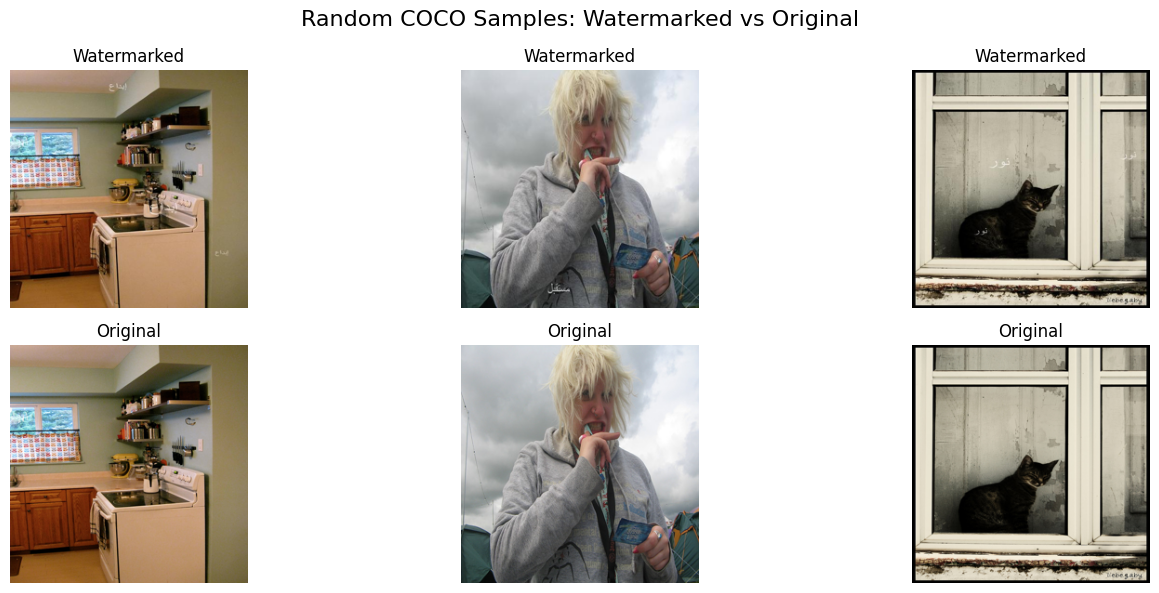

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_three_channels(images):
    return np.repeat(images, 3, axis=-1)

def convert_to_black_and_white(images):
    # Convert to grayscale
    gray_images = np.dot(images[..., :3], [0.299, 0.587, 0.114])
    # Expand grayscale to 3 channels
    bw_images = np.repeat(gray_images[..., np.newaxis], 3, axis=-1)
    return bw_images

def plot_comparison(watermarked, clean, generated, n=3):
    plt.figure(figsize=(15, 10))  # increase the figure size
    for i in range(n):
        # Display watermarked image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(watermarked[i].reshape(256, 256, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)



        # Display generated image (converted to black and white)
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(convert_to_black_and_white(generated[i].reshape(256, 256, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Convert watermarked images to three channels
watermarked_images_3ch = convert_to_three_channels(watermarked_images)

# Select a sample of images to display
idx = np.random.randint(0, watermarked_images.shape[0], 3)  # select only 3 samples
sample_watermarked = watermarked_images_3ch[idx]
sample_clean = clean_images[idx]
sample_generated = generator_loaded.predict(sample_watermarked)

plot_comparison(sample_watermarked, sample_clean, sample_generated)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gc
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Step 1: Convert grayscale to 3-channel RGB
def convert_to_three_channels(images):
    return np.repeat(images, 3, axis=-1)

# Step 2: Batch-safe prediction with memory control
def batch_predict(model, data, batch_size=8):
    predictions = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        try:
            pred = model.predict(batch)
            predictions.append(pred)
        except tf.errors.ResourceExhaustedError:
            print(f"⚠️ OOM on batch {i}–{i+batch_size}, reducing batch size to 4.")
            return batch_predict(model, data, batch_size=4)
    return np.vstack(predictions)

# Step 3: Calculate metrics for grayscale comparison
def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)
        prediction = generated[i].reshape(256, 256, 3)

        # Convert predicted RGB to grayscale
        prediction_gray = np.dot(prediction[..., :3], [0.299, 0.587, 0.114])

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction_gray)))
        psnr_values.append(psnr(original, prediction_gray, data_range=1.0))
        ssim_values.append(ssim(original, prediction_gray, data_range=1.0))

    average_rmse = np.mean(rmse_values)
    average_psnr = np.mean(psnr_values)
    average_ssim = np.mean(ssim_values)

    return average_rmse, average_psnr, average_ssim

# Step 4: Pre-clean memory before heavy inference
gc.collect()
tf.keras.backend.clear_session()

# Step 5: Prepare image data
test_watermarked = convert_to_three_channels(watermarked_images)
test_clean = clean_images

# (Optional) Reduce set size to avoid OOM during dev/test
# test_watermarked = test_watermarked[:100]
# test_clean = test_clean[:100]

# Step 6: Predict images safely
test_generated = batch_predict(generator_loaded, test_watermarked, batch_size=8)

# Step 7: Compute metrics
average_rmse, average_psnr, average_ssim = calculate_metrics(test_clean, test_generated)


# Step 8: Display results
print("\n✅ Evaluation Complete")
print("Average RMSE:", average_rmse)
print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)


✅ Evaluation Complete
Average RMSE: 0.1067895462210784
Average PSNR: 18.92154606821083
Average SSIM: 0.565895214856597


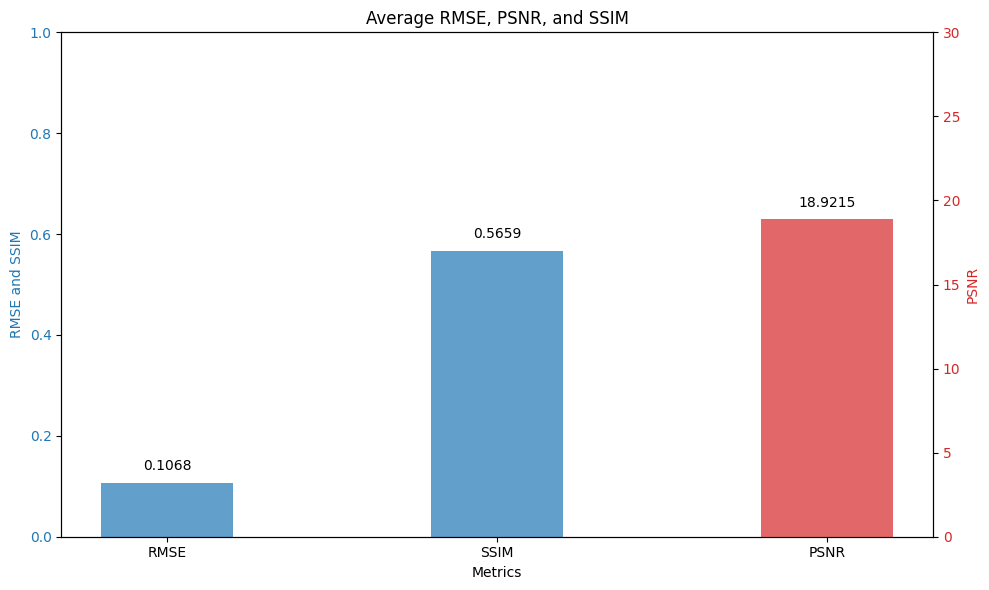

In [22]:
# Metrics and their values
metrics = ['RMSE', 'SSIM']
values_left = [average_rmse, average_ssim]
values_right = [average_psnr]

# Plotting the bar plot with RMSE and SSIM on the left y-axis and PSNR on the right y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE and SSIM on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Metrics')
ax1.set_ylabel('RMSE and SSIM', color=color)
bars1 = ax1.bar([0, 1], values_left, color=color, alpha=0.7, width=0.4, label=['RMSE', 'SSIM'])
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['RMSE', 'SSIM', 'PSNR'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)  # Setting y-axis limit for RMSE and SSIM

# Adding the exact values on top of RMSE and SSIM bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 4), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

# Create another y-axis for PSNR on the right
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('PSNR', color=color)
bars2 = ax2.bar(2, values_right, color=color, alpha=0.7, width=0.4, label='PSNR')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 20)  # Setting y-axis limit for PSNR

# Adding the exact value on top of the PSNR bar
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 4), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

# Title and layout adjustments
plt.title('Average RMSE, PSNR, and SSIM')
fig.tight_layout()  # To ensure everything fits without overlapping

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_metrics(clean, generated):
    rmse_values = []
    psnr_values = []
    ssim_values = []

    for i in range(clean.shape[0]):
        original = clean[i].reshape(256, 256)

        # Convert the generated image to grayscale
        prediction = np.mean(generated[i], axis=2).reshape(256, 256)

        rmse_values.append(np.sqrt(mean_squared_error(original, prediction)))
        psnr_values.append(psnr(original, prediction))
        ssim_values.append(ssim(original, prediction))

    return rmse_values, psnr_values, ssim_values

# Calculate metrics for the entire test set
rmse_values, psnr_values, ssim_values = calculate_metrics(test_clean, test_generated)


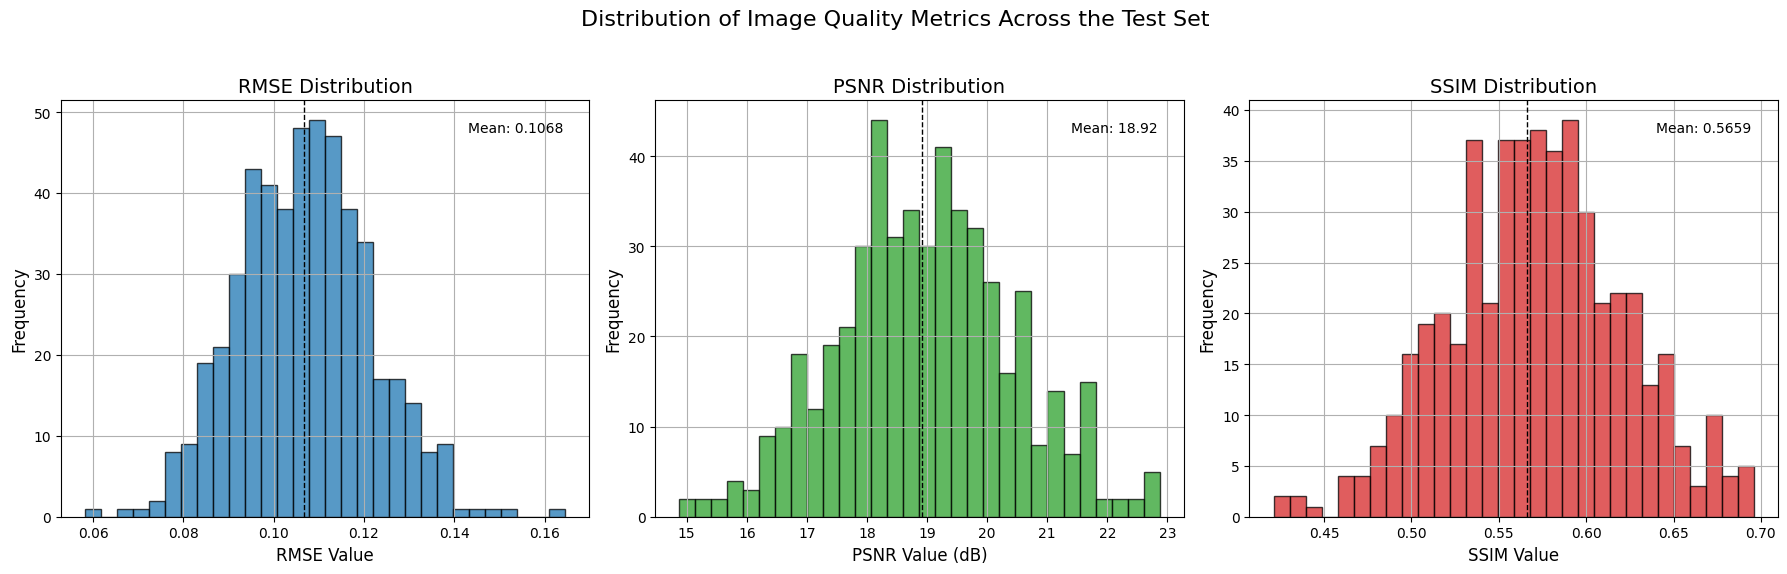

In [26]:
import matplotlib.pyplot as plt

# Assuming rmse_values, psnr_values, and ssim_values are already calculated
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Distribution of Image Quality Metrics Across the Test Set', fontsize=16)

# Define colors
colors = ['#1f77b4', '#2ca02c', '#d62728']

# RMSE Histogram
axes[0].hist(rmse_values, bins=30, color=colors[0], alpha=0.7, edgecolor='black')
axes[0].set_title('RMSE Distribution', fontsize=14)
axes[0].set_xlabel('RMSE Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True)

# PSNR Histogram
axes[1].hist(psnr_values, bins=30, color=colors[1], alpha=0.7, edgecolor='black')
axes[1].set_title('PSNR Distribution', fontsize=14)
axes[1].set_xlabel('PSNR Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True)

# SSIM Histogram
axes[2].hist(ssim_values, bins=30, color=colors[2], alpha=0.7, edgecolor='black')
axes[2].set_title('SSIM Distribution', fontsize=14)
axes[2].set_xlabel('SSIM Value', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


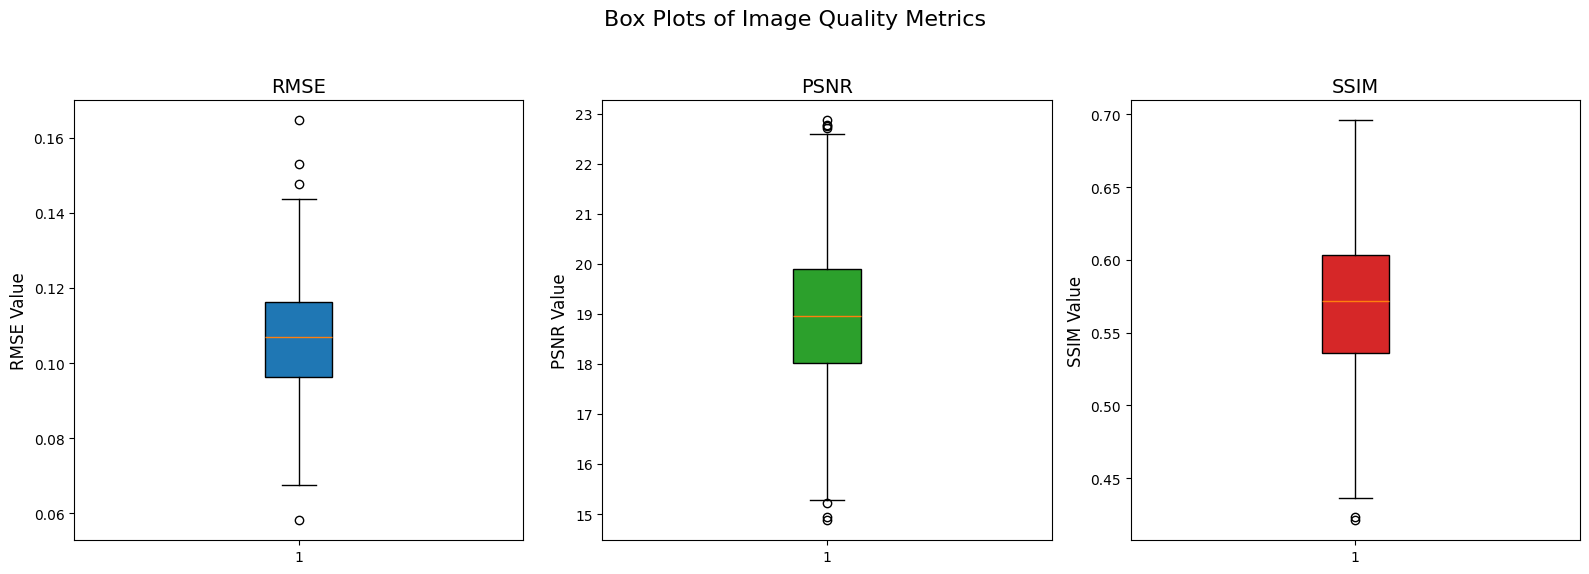

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Box Plots of Image Quality Metrics', fontsize=16)

colors = ['#1f77b4', '#2ca02c', '#d62728']


axes[0].boxplot(rmse_values, patch_artist=True, boxprops=dict(facecolor=colors[0]))
axes[0].set_title('RMSE', fontsize=14)
axes[0].set_ylabel('RMSE Value', fontsize=12)

axes[1].boxplot(psnr_values, patch_artist=True, boxprops=dict(facecolor=colors[1]))
axes[1].set_title('PSNR', fontsize=14)
axes[1].set_ylabel('PSNR Value', fontsize=12)

axes[2].boxplot(ssim_values, patch_artist=True, boxprops=dict(facecolor=colors[2]))
axes[2].set_title('SSIM', fontsize=14)
axes[2].set_ylabel('SSIM Value', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


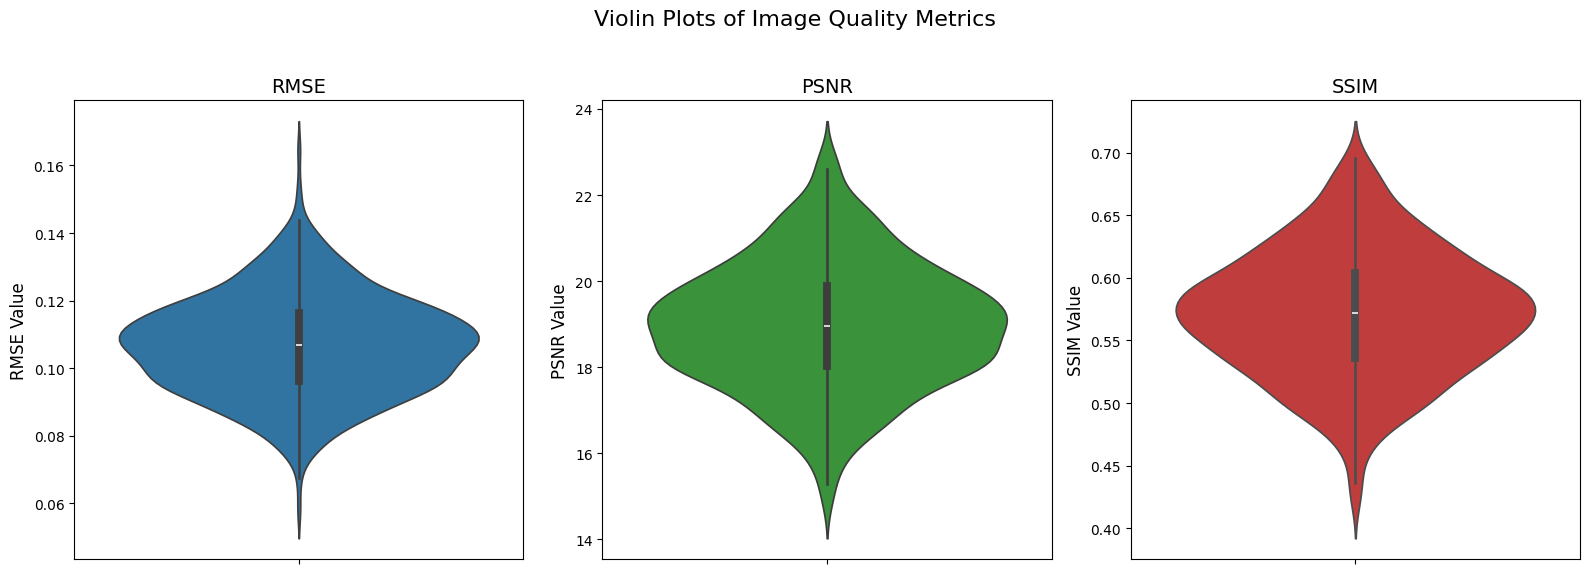

In [28]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Violin Plots of Image Quality Metrics', fontsize=16)

sns.violinplot(ax=axes[0], data=rmse_values, color=colors[0])
axes[0].set_title('RMSE', fontsize=14)
axes[0].set_ylabel('RMSE Value', fontsize=12)

sns.violinplot(ax=axes[1], data=psnr_values, color=colors[1])
axes[1].set_title('PSNR', fontsize=14)
axes[1].set_ylabel('PSNR Value', fontsize=12)

sns.violinplot(ax=axes[2], data=ssim_values, color=colors[2])
axes[2].set_title('SSIM', fontsize=14)
axes[2].set_ylabel('SSIM Value', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


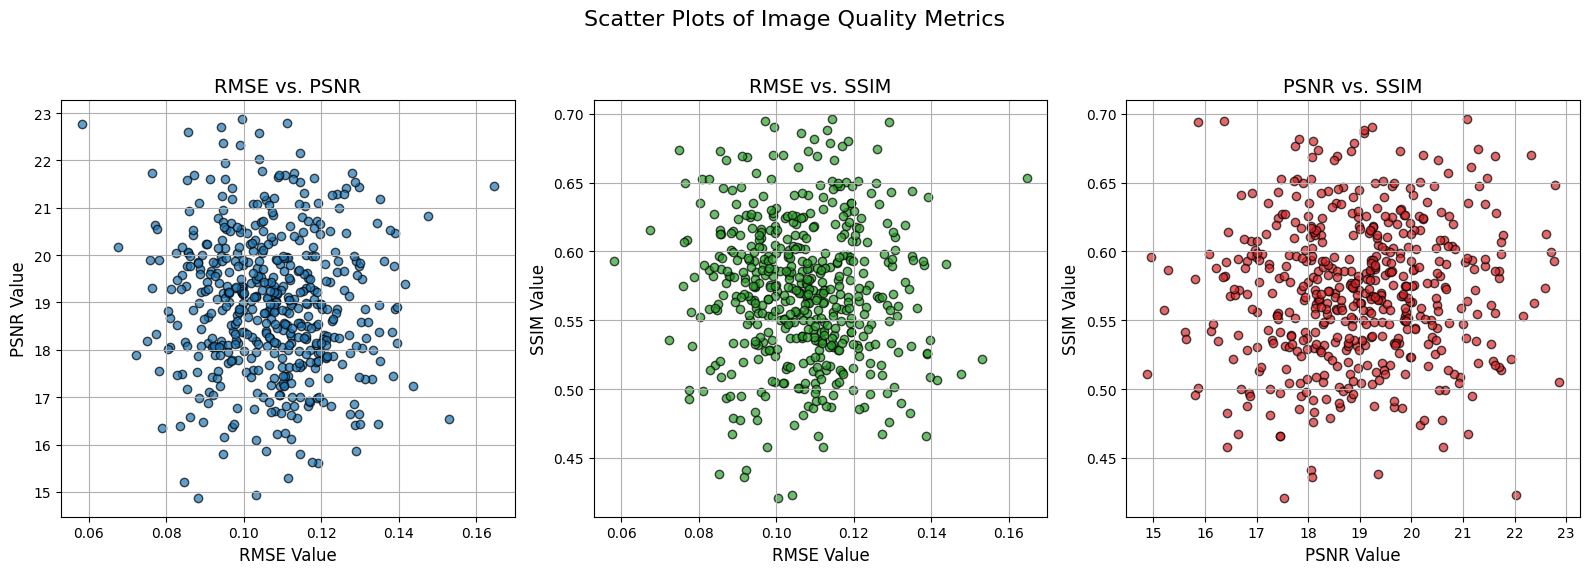

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Scatter Plots of Image Quality Metrics', fontsize=16)

axes[0].scatter(rmse_values, psnr_values, color=colors[0], alpha=0.7, edgecolor='black')
axes[0].set_title('RMSE vs. PSNR', fontsize=14)
axes[0].set_xlabel('RMSE Value', fontsize=12)
axes[0].set_ylabel('PSNR Value', fontsize=12)
axes[0].grid(True)

axes[1].scatter(rmse_values, ssim_values, color=colors[1], alpha=0.7, edgecolor='black')
axes[1].set_title('RMSE vs. SSIM', fontsize=14)
axes[1].set_xlabel('RMSE Value', fontsize=12)
axes[1].set_ylabel('SSIM Value', fontsize=12)
axes[1].grid(True)

axes[2].scatter(psnr_values, ssim_values, color=colors[2], alpha=0.7, edgecolor='black')
axes[2].set_title('PSNR vs. SSIM', fontsize=14)
axes[2].set_xlabel('PSNR Value', fontsize=12)
axes[2].set_ylabel('SSIM Value', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


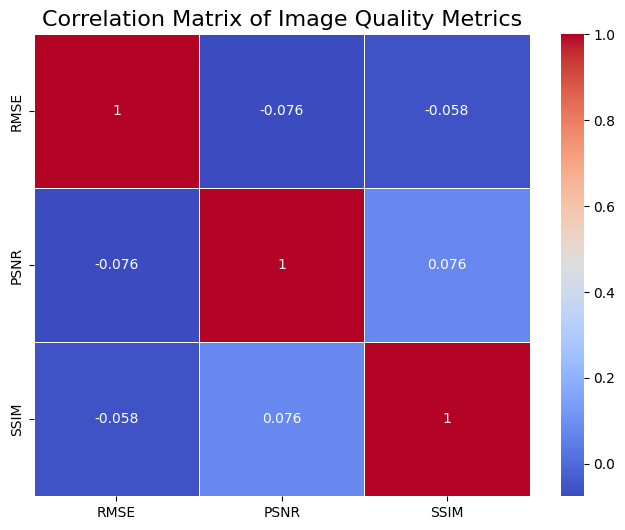

In [30]:
import seaborn as sns
import pandas as pd

data = {'RMSE': rmse_values, 'PSNR': psnr_values, 'SSIM': ssim_values}
df = pd.DataFrame(data)

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Image Quality Metrics', fontsize=16)
plt.show()


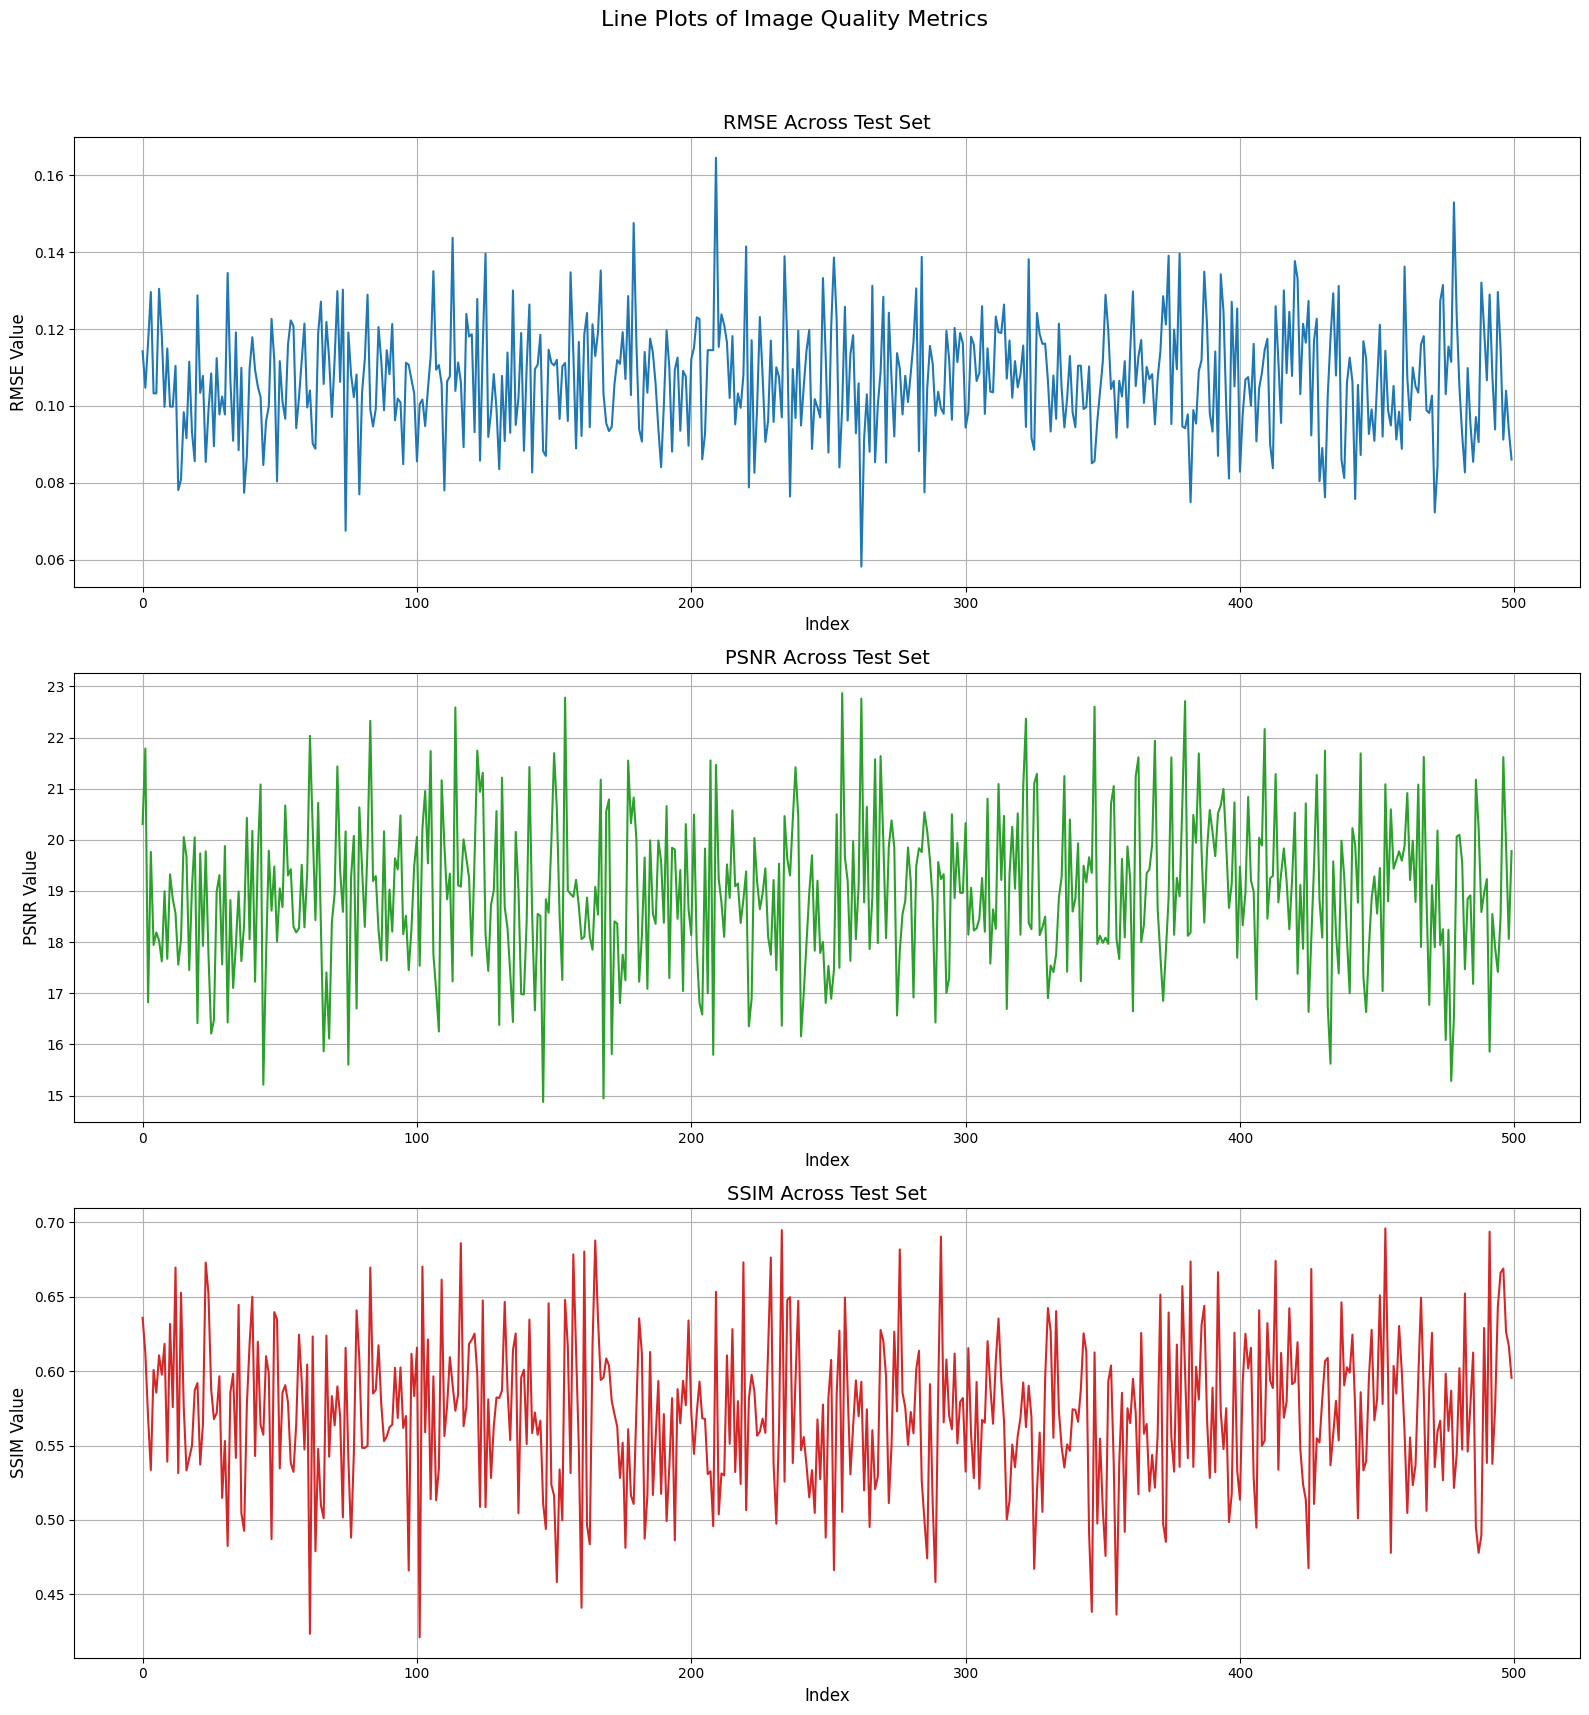

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(16, 18))
fig.suptitle('Line Plots of Image Quality Metrics', fontsize=16)

axes[0].plot(rmse_values, color=colors[0])
axes[0].set_title('RMSE Across Test Set', fontsize=14)
axes[0].set_xlabel('Index', fontsize=12)
axes[0].set_ylabel('RMSE Value', fontsize=12)
axes[0].grid(True)

axes[1].plot(psnr_values, color=colors[1])
axes[1].set_title('PSNR Across Test Set', fontsize=14)
axes[1].set_xlabel('Index', fontsize=12)
axes[1].set_ylabel('PSNR Value', fontsize=12)
axes[1].grid(True)

axes[2].plot(ssim_values, color=colors[2])
axes[2].set_title('SSIM Across Test Set', fontsize=14)
axes[2].set_xlabel('Index', fontsize=12)
axes[2].set_ylabel('SSIM Value', fontsize=12)
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
